# 📊 Demo: Detección de Sesgos con Fairlearn

- Carga del dataset **Adult** (local)
- Exploración de datos (EDA)
- Entrenamiento de un modelo de clasificación
- Evaluación de sesgos (gender bias) con **Fairlearn**
- Visualización de métricas

In [ ]:
%pip install fairlearn scikit-learn matplotlib seaborn pandas

  Using cached fairlearn-0.13.0-py3-none-any.whl.metadata (7.3 kB)
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached narwhals-2.12.0-py3-none-any.whl.metadata (11 kB)
  Using cached joblib-1.5.2-py3-none-any.whl.metadata (5.6 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached pyparsing-3.2.5-py3-none-any.whl.metadata (5.0 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
Using cached fairlearn-0.13.0-py3-none-any.whl (251 kB)
   ---------------------------------------- 0.0/41.0 MB ? eta -:--:--
   ------------ --------------------------- 13.1/41.0 MB 62.9 MB/s eta 0:00:01
   ------------------------- -------------- 25.7/41.0 MB 62.6 MB/s eta 0:00:01
   ----------------------------------- ---- 36.7/41.0 MB 62.3 MB/s eta 0:00:01
   ---------------------------------------  4


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


## 📥 Cargar dataset Adult (archivo local)

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

columns = [
    "age", "workclass", "fnlwgt", "education", "education_num", "marital_status",
    "occupation", "relationship", "race", "sex", "capital_gain",
    "capital_loss", "hours_per_week", "native_country", "income"
]

df = pd.read_csv("dataset/adult.data", header=None, names=columns, skipinitialspace=True)
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## 📘 Información general del dataset

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


## 🔍 Valores faltantes

In [5]:
df.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

## 🎯 Distribución de la variable objetivo (income)

In [6]:
df["income"].value_counts(normalize=True)

income
<=50K    0.75919
>50K     0.24081
Name: proportion, dtype: float64

## 👥 Distribución de género (atributo sensible)

In [8]:
df["sex"].value_counts(normalize=True)

sex
Male      0.669205
Female    0.330795
Name: proportion, dtype: float64

## 🔥 Gráfico de ingresos por género

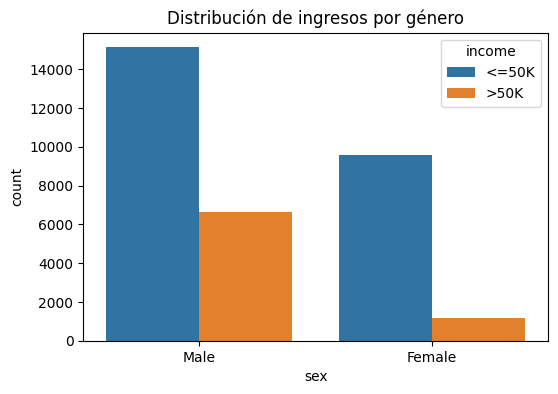

In [9]:
plt.figure(figsize=(6,4))
sns.countplot(x="sex", hue="income", data=df)
plt.title("Distribución de ingresos por género")
plt.show()

## 🧠 Preparación para el modelo

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Convertir income a binario
y = (df["income"].str.contains(">50K")).astype(int)

# Atributo sensible
A = df["sex"]

# Variables numéricas
X = df[["age", "education_num", "capital_gain", "capital_loss", "hours_per_week"]]

X_train, X_test, y_train, y_test, A_train, A_test = train_test_split(
    X, y, A, test_size=0.3, random_state=42
)

## 🤖 Entrenar modelo (Logistic Regression)

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression(max_iter=2000).fit(X_train, y_train)
preds = model.predict(X_test)

acc = accuracy_score(y_test, preds)
acc

0.8164602313440475

## ⚖️ Análisis de Sesgos con Fairlearn

In [12]:
from fairlearn.metrics import MetricFrame, selection_rate, demographic_parity_difference

mf = MetricFrame(
    metrics=selection_rate,
    y_true=y_test,
    y_pred=preds,
    sensitive_features=A_test
)

mf.by_group

sex
Female    0.082149
Male      0.162762
Name: selection_rate, dtype: float64

## 📏 Métrica de Sesgo: Demographic Parity Difference

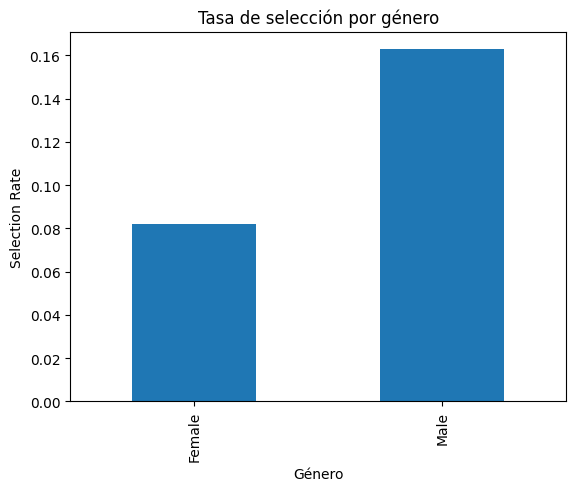

In [18]:
mf.by_group.plot(kind="bar", title="Tasa de selección por género")
plt.xlabel("Género")
plt.ylabel("Selection Rate")
plt.show()